Tiempo de computo del algoritmo RK: 1.7e-05 min


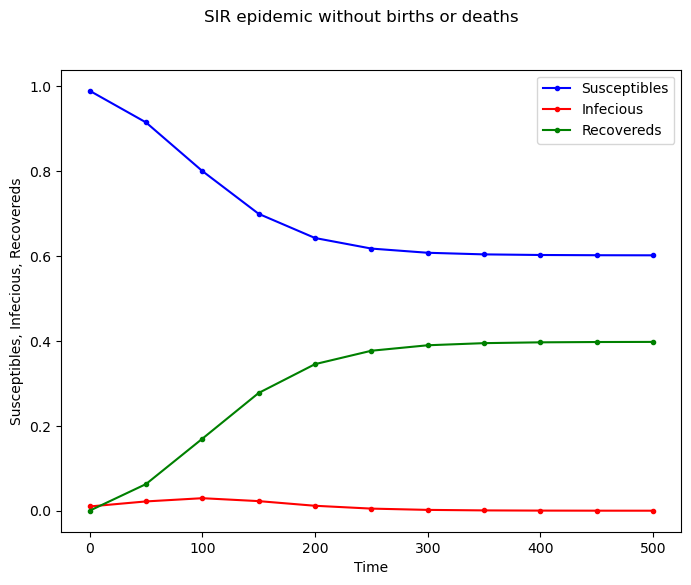

In [125]:
import numpy as np
import time
import matplotlib.pyplot as plt

#Sistema de Ecuaciones Diferenciales
def SIR(t, statevector, params):
    gamma, beta = params
    
    s, i, r = statevector
    
    ds = -beta * s * i
    di = beta * s * i - gamma * i
    dr = gamma * i
    
    return np.array([ds, di, dr])

#Definción Runge-Kutta Paso Fijo
def RK4(func, initial_state, t0, tf, h, params):
    times = np.arange(t0,tf + h, h)
    num_steps = len(times)
    
    states = np.zeros((num_steps, len(initial_state)))
    states[0] = initial_state
    
    for i in range(1, num_steps):
        k1 = h * func(times[i - 1], states[i - 1], params)
        k2 = h * func(times[i - 1] + 0.5 * h, states[i - 1] + 0.5 * k1, params)
        k3 = h * func(times[i - 1] + 0.5 * h, states[i - 1] + 0.5 * k2, params)
        k4 = h * func(times[i - 1] + h, states[i - 1] + k3, params)
        
        states[i] = states[i - 1] + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0
    
    sol = np.transpose(np.concatenate((times.reshape(-1,1), states),1))
    return sol

#Dedfinición de la gráfica
def grafica(sol):

    t = sol[0]   
    s = sol[1]
    i = sol[2]
    r = sol[3]
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(t, s, "b.-",label=r"Susceptibles")
    ax.plot(t, i, "r.-",label=r"Infecious")
    ax.plot(t, r, "g.-",label=r"Recovereds")


    ax.set_xlabel(r"Time")
    ax.set_ylabel(r"Susceptibles, Infecious, Recovereds")
    ax.legend()


    fig.suptitle("SIR epidemic without births or deaths")
    
    
if __name__ == "__main__":
    #Parámetros
    beta = 0.1
    gamma = 0.08
    params = [gamma, beta]
    
    #Condiciones Iniciales
    ci = np.array([0.99, 0.01, 0.0])
    
    #Intervalo de tiempo
    t0 = 0
    tf = 500
    h = 5e1
    
    #Solución
    tci = time.time()    
    

    sol = RK4(SIR, ci, t0, tf, h, params)

    tcf = time.time()
    print(f"Tiempo de computo del algoritmo RK: {(tcf- tci)/60:.2} min")
    
    #Gráfica
    grafica(sol)
    

    
  


In [83]:
# Mirar implementación de la función de Runge-Kutta con paso adaptativo
#Comparar rendimiento

In [84]:
%matplotlib inline


